In [8]:
import numpy as np

a = np.loadtxt('peche_clean_sans_titre.csv',dtype = np.int32, delimiter = ",")
a

array([[   1996,      11,  165890,  319104,       0],
       [   1996,      12,  268978,  527364,       0],
       [   1997,       1,  173600,  297604,       0],
       [   1997,       2,  333317,  584564,       0],
       [   1997,       3,  303077,  524834,       0],
       [   1997,       4,   58941,  108066,       0],
       [   1997,      10,    2177,    3923,       0],
       [   1997,      11,  268786,  478587,       0],
       [   1997,      12,  292502,  540332,       0],
       [   1998,       1,  127659,  228984,       0],
       [   1998,       2,  266009,  471490,       0],
       [   1998,       3,  279767,  533178,       0],
       [   1998,       4,  149402,  306845,       0],
       [   1998,       5,     312,     718,       0],
       [   1998,      10,    5081,   16690,       0],
       [   1998,      11,  124089,  255247,       0],
       [   1998,      12,  238237,  513974,       0],
       [   1999,       1,  148137,  291130,       0],
       [   1999,       2,  2

In [168]:
def decoupe(t):
    '''Retourne an array avec les arrays correspondant aux colonnes du tableau'''
    lst = []
    for i in range(t.shape[1]):
        lst.append(t[:,i])
    lst2 = np.array(lst)
    return lst2
        

# Découper les colonnes:
annee, mois, ventes, valeur, invendu = decoupe(a)

# Définition des arrays:
month = np.unique(mois)
years = np.unique(annee)


years = np.unique(annee)
yearly_sales = np.array([ventes[annee ==x].sum() for x in years])
yearly_value = np.array([valeur[annee ==x].sum() for x in years])
yearly_prices = yearly_value/yearly_sales

month = np.unique(mois)
monthly_sales = np.array([ventes[mois ==x].sum() for x in month])
monthly_value = np.array([valeur[mois ==x].sum() for x in month])
monthly_prices = monthly_value/monthly_sales


def yearly_sales_evolution_tons():
    '''Retourne les ventes annuelles,tonnes et son evolution,en % et en tonnes, par rapport à l'année précedente'''
    years = np.unique(annee)
    yearly_sales = np.array([ventes[annee ==x].sum()/1000 for x in years])
    yearly_sales_evolution_tons = [(yearly_sales[x] - yearly_sales[x-1]) if x>0 else 0 for x in range(len(years))]
    yearly_sales_evolution = [((yearly_sales[x] - yearly_sales[x-1])/yearly_sales[x-1])*100 if x>0 else 0 for x in range(len(years)) ]
    res = list(zip(years,yearly_sales,yearly_sales_evolution,yearly_sales_evolution_tons))
    return res

def yearly_sales_evolution_graph():
    '''Retourne les ventes annuelles,tonnes et son evolution,kg par rapport à l'année précedente'''
    import matplotlib.pyplot as plt
    years = np.unique(annee)
    yearly_sales = np.array([ventes[annee ==x].sum()/1000 for x in years])
    plt.plot(years,yearly_sales)
    plt.xlabel('Years')
    plt.ylabel('Sales')
    plt.title('Yearly sales, tons & yearly sales evolution, kg')
    
    yearly_sales_evolution_kg = [(yearly_sales[x] - yearly_sales[x-1]) if x>0 else 0 for x in range(len(years))]
    plt.bar(years,yearly_sales_evolution_kg)
    return


def yearly_prices_evolution():
    '''Retourne les prix de ventes annuels,€/kg et son evolution, en % par rapport à l'année précedente'''
    years = np.unique(annee)
    yearly_sales = np.array([ventes[annee ==x].sum() for x in years])
    yearly_value = np.array([valeur[annee ==x].sum() for x in years])
    yearly_prices = yearly_value/yearly_sales    
    yearly_prices_evolution = [ ( (yearly_prices[x] - yearly_prices[x-1])/yearly_prices[x-1])*100 if x>0 else 0 for x in range(len(years)) ]
    res = list(zip(years,yearly_prices,yearly_prices_evolution))
    return res    

def yearly_prices_graph():
    '''Retourne les prix de ventes annuels,€/kg et son evolution, en % par rapport à l'année précedente'''
    import matplotlib.pyplot as plt
    years = np.unique(annee)
    yearly_value = np.array([valeur[annee ==x].sum() for x in years])
    yearly_sales = np.array([ventes[annee ==x].sum() for x in years])
    yearly_prices = np.array(yearly_value/yearly_sales)
    plt.plot(years,yearly_prices)
    plt.xlabel('Year')
    plt.ylabel('Price, €/kg')
    plt.title('Yearly prices evolution, €/kg')
    return

    
def monthly_prices():
    '''Retourne les prix mensuels'''
    month = np.unique(mois)
    monthly_sales = np.array([ventes[mois ==x].sum() for x in month])
    monthly_value = np.array([valeur[mois ==x].sum() for x in month])
    monthly_prices = monthly_value/monthly_sales
    resultat = list(zip(month,monthly_prices))
    return resultat

def monthly_prices_graph():
    '''Retourne les prix mensuels'''
    import matplotlib.pyplot as plt
    month = np.unique(mois)
    monthly_sales = np.array([ventes[mois ==x].sum() for x in month])
    monthly_value = np.array([valeur[mois ==x].sum() for x in month])
    monthly_prices = monthly_value/monthly_sales
    plt.bar(month,monthly_prices)
    plt.xlabel('Month')
    plt.ylabel('Price, €/kg')
    plt.title('Monthly prices, €/kg')
    return


def total_period_price_change():
    '''Retourne l'évolution du prix annuel en % entre le début et la fin de la période'''
    yearly_value = np.array([valeur[annee ==x].sum() for x in years])
    yearly_sales = np.array([ventes[annee ==x].sum() for x in years])
    yearly_prices = np.array(yearly_value/yearly_sales)
    res = ((yearly_prices[-1]-yearly_prices[0])/yearly_prices[0])*100
    return res



In [165]:
yearly_sales_evolution_tons()

[(1996, 434.868, 0, 0),
 (1997, 1432.4, 229.3873083326435, 997.5320000000002),
 (1998, 1190.556, -16.883831332030162, -241.84400000000005),
 (1999, 1413.617, 18.7358679474128, 223.06099999999992),
 (2000, 1352.865, -4.297627999663272, -60.75199999999995),
 (2001, 2065.449, 52.672217848787575, 712.5840000000001),
 (2002, 2503.306, 21.19911941664984, 437.85699999999997),
 (2003, 2711.753, 8.326868549030767, 208.44700000000012),
 (2004, 2395.869, -11.64870104319973, -315.884),
 (2005, 2534.022, 5.7663002442954845, 138.1529999999998),
 (2006, 2642.716, 4.2893865956964845, 108.69399999999996),
 (2007, 3470.844, 31.33624649792108, 828.1280000000002),
 (2008, 3188.87, -8.124075873188197, -281.97400000000016),
 (2009, 2921.571, -8.382248257219642, -267.299),
 (2010, 2493.147, -14.664165272724846, -428.424),
 (2011, 3197.95, 28.269612662229697, 704.8029999999999),
 (2012, 3290.522, 2.89472943604497, 92.57200000000012),
 (2013, 3093.451, -5.989049761709538, -197.0709999999999),
 (2014, 3069.88, 

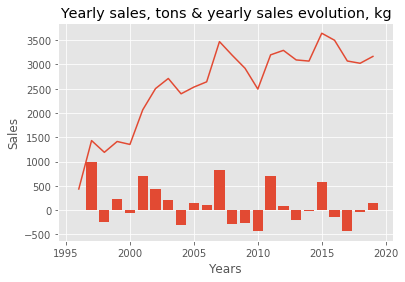

In [160]:
yearly_sales_evolution_graph()

In [169]:
yearly_prices_evolution()

[(1996, 1.9464941085570795, 0),
 (1997, 1.7717886065344877, -8.975393311213237),
 (1998, 1.954654799942212, 10.320993866497401),
 (1999, 2.039484527987425, 4.339882829833749),
 (2000, 2.281220964397778, 11.852820312831673),
 (2001, 2.241286035142964, -1.7505945227605841),
 (2002, 2.02195976041283, -9.78573333751862),
 (2003, 2.0879102927147124, 3.2617133927738107),
 (2004, 1.9602632698198441, -6.113625826754316),
 (2005, 1.8979223542652748, -3.180231783881698),
 (2006, 1.9432345359849488, 2.3874623541812534),
 (2007, 1.883437573109019, -3.0771871211943607),
 (2008, 1.9141068779849915, 1.628368538137754),
 (2009, 1.9903760682180922, 3.9845836776570414),
 (2010, 2.021571932982692, 1.5673352017605637),
 (2011, 2.0401335230381963, 0.9181760862754804),
 (2012, 2.070170629462438, 1.4723108112801273),
 (2013, 2.126234745596423, 2.708188172321979),
 (2014, 2.256331192098714, 6.118630446225645),
 (2015, 2.2840572382670636, 1.2288110125606284),
 (2016, 2.3131674408342033, 1.2744953182182899),
 (

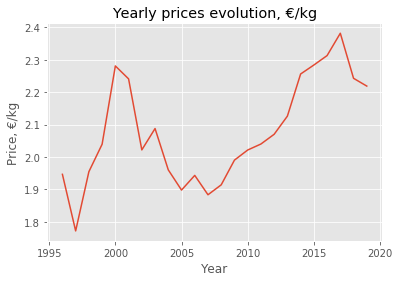

In [148]:
yearly_prices_graph()

In [143]:
monthly_prices()

[(1, 1.977037669509031),
 (2, 1.985131268054085),
 (3, 1.988490440651946),
 (4, 1.9849145373629073),
 (5, 1.9509999647062253),
 (10, 2.077694222176331),
 (11, 2.2333856135944083),
 (12, 2.2840774648194198)]

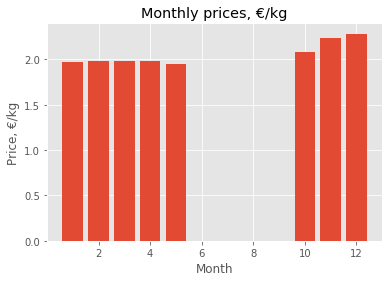

In [157]:
monthly_prices_graph()

In [166]:
total_period_price_change()

14.000631184257117

In [137]:
# 9.Le prix de vente au kg peut-il être mis en relation avec le tonnage pêché ?
#tonnage pêché = vendu + invendu

def volume_prices_corr():
    tonnage = np.array(ventes + invendu)
    prix = valeur/ventes
    x = tonnage
    y = prix
    res = np.corrcoef(x, y)

    import matplotlib
    import matplotlib.pyplot as plt
    plt.scatter(tonnage, prix)
    plt.show()
    return res


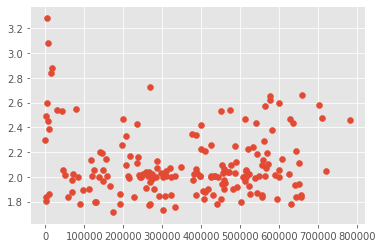

array([[ 1.        , -0.05963687],
       [-0.05963687,  1.        ]])

In [138]:
volume_prices_corr()